In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [117]:
from nltk.stem import WordNetLemmatizer

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [119]:
from spell import correction

In [120]:
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer


In [4]:
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [121]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
#import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
#from textblob import TextBlob
#from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [225]:
#importing the training data
imdb_data1=pd.read_csv('IMDB Dataset.csv')
print(imdb_data1.shape)
imdb_data1.head(5)


(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [167]:
imdb_data=imdb_data1



In [168]:
imdb_data



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [169]:
# imdb_data=imdb_data1[:10000]
# imdb_data.shape

In [170]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [171]:
#sentiment count
imdb_data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

<BarContainer object of 10000 artists>

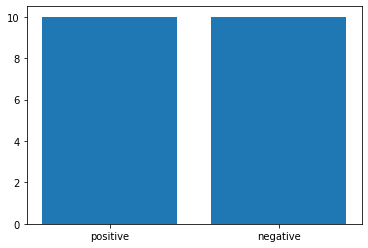

In [71]:
plt.bar(x=imdb_data['sentiment'],height=10)

In [46]:
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [13]:

#setting english stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [14]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [172]:
#removing noise like removing html parser, square brackets

def strip_html(text):
    soup=BeautifulSoup(text,'html.parser')
    return soup.get_text()

def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '',text)

def remove_noise(text):
    text=strip_html(text)
    text=remove_square_brackets(text)
    return text


In [173]:
imdb_data['review']=imdb_data['review'].apply(remove_noise)

In [174]:
imdb_data['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [175]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [176]:
imdb_data['review'][1]

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [177]:
# def tokenize(text):
#     #text = re.sub("[^a-zA-Z]", " ", text) # remove non letters
#     # text = re.sub(r'\b\w{1,3}\b', '', text) # remove letters with less than 3 chars
#     # tokenize (split into words)
#     tokens = nltk.word_tokenize(text)   
#     return tokens

In [178]:
# imdb_data['review']=imdb_data['review'].apply(tokenize)

In [179]:
# imdb_data['review'][1]

In [180]:
# def correct(text):
#     for item in text:
#         corrected= correction(item)
#     return corrected

In [181]:
# imdb_data['review']=imdb_data['review'].apply(correct)

In [182]:
# def lemmatize_tokens(text):
#     lemm = WordNetLemmatizer()
#     text= ' '.join([lemm.lemmatize(word) for word in text])  
#     return text


In [183]:
# imdb_data['review']=imdb_data['review'].apply(lemmatize_tokens)

In [184]:
lemm = WordNetLemmatizer()
def lemmatize_tokens(tokens, lemm):
    lemmatized = []
    for item in tokens:
        lemmatized.append(lemm.lemmatize(item))
    return lemmatized



In [185]:
imdb_data['review'][1]

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [186]:
# def simple_stemmer(text):
#     ps=nltk.porter.PorterStemmer()
#     text= ' '.join([ps.stem(word) for word in text.split()])
#     return text

In [187]:
def tokenize(text):
    #text = re.sub("[^a-zA-Z]", " ", text) # remove non letters
    # text = re.sub(r'\b\w{1,3}\b', '', text) # remove letters with less than 3 chars
    # tokenize (split into words)
    tokens = nltk.word_tokenize(text)    
    # stem
    stems = lemmatize_tokens(tokens, lemm)
    #stems = stem_tokens(tokens, stemmer)
    return stems

In [188]:
#imdb_data['review']=imdb_data['review'].apply(tokenize)

In [189]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True, #We want only lower cased words during vectorization
    stop_words = 'english', # Remove unwanted words from the sentences. Words like - is,the,if,it,etc are not required
    max_features =1000 # we are only considering first 100 features for sentiment classification
)

In [190]:
corpus_data_features = vectorizer.fit_transform(imdb_data.review.tolist())


In [192]:
corpus_data_features_nd = corpus_data_features.toarray()

In [193]:
corpus_data_features_nd

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [194]:
corpus_data_features_nd.shape

(50000, 1000)

In [195]:
vocab = vectorizer.get_feature_names()
vocab[:50]

['1',
 '10',
 '12',
 '15',
 '2',
 '20',
 '3',
 '30',
 '4',
 '5',
 '50',
 '7',
 '70',
 '80',
 '90',
 '`',
 'ability',
 'able',
 'absolutely',
 'accent',
 'act',
 'acted',
 'acting',
 'action',
 'actor',
 'actress',
 'actual',
 'actually',
 'adaptation',
 'add',
 'added',
 'admit',
 'adult',
 'adventure',
 'age',
 'agent',
 'ago',
 'agree',
 'air',
 'alien',
 'alive',
 'amazing',
 'america',
 'american',
 'amusing',
 'animal',
 'animation',
 'annoying',
 'answer',
 'apart']

In [196]:
# #labeling the sentient data
# lb=LabelBinarizer()
# #transformed sentiment data
# imdb_data=lb.fit_transform(imdb_data['sentiment'])
# print(imdb_data.shape)

In [197]:
sent={'positive':0,'negative':1}

In [198]:
imdb_data['sentiment']=imdb_data['sentiment'].map(sent)

In [199]:
imdb_data.shape

(50000, 2)

In [102]:
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments.shape)
print(test_sentiments.shape)

(40000, 1)
(10000, 1)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [200]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(corpus_data_features_nd[0:len(imdb_data)]
                                                 ,imdb_data.sentiment
                                                 ,random_state = 42
                                                 ,train_size = 0.75 #75:25 ratio
                                                )

In [201]:
from sklearn.linear_model import LogisticRegression

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c,class_weight='balanced')
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.85904
Accuracy for C=0.05: 0.85984
Accuracy for C=0.25: 0.85928
Accuracy for C=0.5: 0.8588
Accuracy for C=1: 0.85896


In [202]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6343
           1       0.87      0.84      0.85      6157

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



In [223]:
random_reviews = imdb_data.sample(50) # choosing random 15 reviews

## Applying same transformation
features = vectorizer.fit_transform(random_reviews.review.tolist())
features = features.toarray()

# Prediction for random reviews
y_pred_random = lr.predict(features)

random_reviews['Predicted'] = y_pred_random

random_reviews.head()

,review,sentiment,Predicted
47707,The Falcon and the Snowman is the true story o...,0,0
15278,This movie is deeply idiotic A man wants reven...,1,1
49840,I just saw this movie for the first time last ...,0,0
36631,Poor acting no script no plot no convincing ki...,1,0
642,I am amazed with some of the reviews of this f...,1,0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices